In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import main
from Graph import Graph
from Node import Node
from Edge import Edge
import plot_graph

In [2]:
input_directory = r"C:\I24 Motion Project\Anomaly Detection\csv\TM_1000_GT.csv"
df = main.read_full_data(input_directory, 0)

In [4]:
GraphAr = []
maxFrameNum = int(max(df['Frame #']))

for frame in range(maxFrameNum) :
    MyGraph = Graph()
    
    one_frame_df = df.loc[(df['Frame #'] == frame)].sort_values('x').reset_index()
    one_frame_matrix = np.array(one_frame_df)

    # Add all the nodes
    for one_row in one_frame_matrix :
        ID, x_pos, y_pos = one_row[2], one_row[3], one_row[4]
        car_node = Node(ID,x_pos,y_pos,0)
        MyGraph.add_node(car_node)

    # Add all the edges thru sliding window approach
    # def add_edges(one_frame_df, MyGraph) :
    i = 0

    while(len(one_frame_df) != 0) :
        # 1. Prepare ego car node to create edges with.
        ego_car_node = Node(one_frame_df.at[i, 'ID'], 
                            one_frame_df.at[i, 'x'], 
                            one_frame_df.at[i, 'y'], 
                            0)
        window_start = one_frame_df.at[i, 'x']                              # 2. Get x position of left-most car
        window_df = one_frame_df.loc[one_frame_df['x'] < window_start + 40] # 3. Select all cars within window
        # 4. Translate all cars in window as edges and add to graph.
        window_ar = np.array(window_df)

        for car in window_ar :
            ID, x_pos, y_pos = car[2], car[3], car[4]
            car_node = Node(ID, x_pos, y_pos, 0)
            edge1, edge2 = Edge(ego_car_node, car_node), Edge(car_node, ego_car_node)
            MyGraph.add_edge(edge1)
            MyGraph.add_edge(edge2)

        # 5. Drop the very first row.
        one_frame_df.drop(index=i,inplace=True)
        i += 1
        
    GraphAr.append(MyGraph)
    
    if frame & 100 == 0 :
        print("Processing Completion : ", round((frame / maxFrameNum), 2), "%\r")

Processing Completion :  0.0
Processing Completion :  0.0004830917874396135
Processing Completion :  0.000966183574879227
Processing Completion :  0.0014492753623188406
Processing Completion :  0.003864734299516908
Processing Completion :  0.004347826086956522
Processing Completion :  0.004830917874396135
Processing Completion :  0.005314009661835749
Processing Completion :  0.007729468599033816
Processing Completion :  0.00821256038647343
Processing Completion :  0.008695652173913044
Processing Completion :  0.009178743961352657
Processing Completion :  0.011594202898550725
Processing Completion :  0.012077294685990338
Processing Completion :  0.012560386473429951
Processing Completion :  0.013043478260869565
Processing Completion :  0.06183574879227053
Processing Completion :  0.06231884057971015
Processing Completion :  0.06280193236714976
Processing Completion :  0.06328502415458938
Processing Completion :  0.06570048309178744
Processing Completion :  0.06618357487922705
Processing

Processing Completion :  0.6884057971014492
Processing Completion :  0.6888888888888889
Processing Completion :  0.6893719806763285
Processing Completion :  0.6917874396135266
Processing Completion :  0.6922705314009662
Processing Completion :  0.6927536231884058
Processing Completion :  0.6932367149758454
Processing Completion :  0.7420289855072464
Processing Completion :  0.7425120772946859
Processing Completion :  0.7429951690821256
Processing Completion :  0.7434782608695653
Processing Completion :  0.7458937198067633
Processing Completion :  0.7463768115942029
Processing Completion :  0.7468599033816425
Processing Completion :  0.7473429951690821
Processing Completion :  0.7497584541062802
Processing Completion :  0.7502415458937198
Processing Completion :  0.7507246376811594
Processing Completion :  0.751207729468599
Processing Completion :  0.7536231884057971
Processing Completion :  0.7541062801932367
Processing Completion :  0.7545893719806763
Processing Completion :  0.755072

<IPython.core.display.Javascript object>


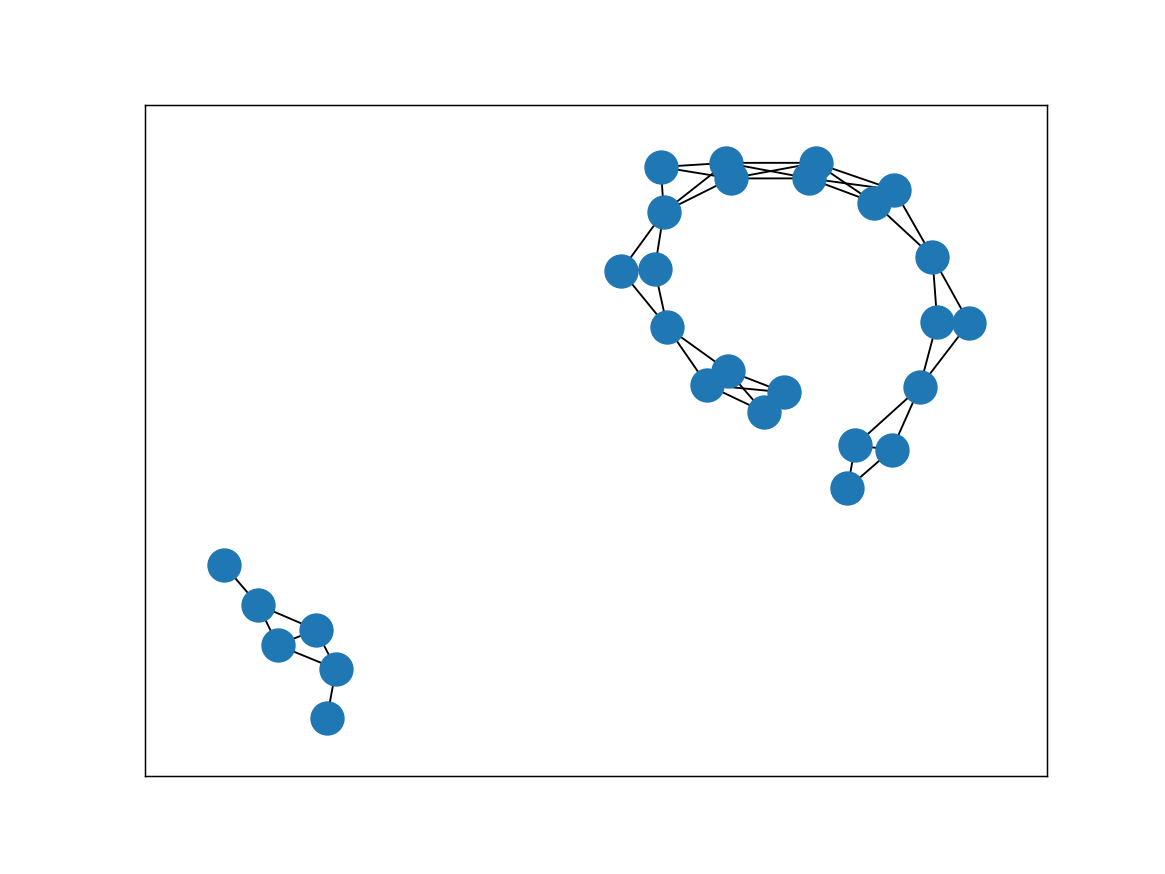

In [6]:
%matplotlib notebook

plot_graph.plot_graph(GraphAr[420])